<a href="https://colab.research.google.com/github/albertomendess/Data-Science/blob/main/Camada_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Camada Linear

In [1]:
import torch
from torch import nn  # neural networks

In [2]:
torch.manual_seed(42)

perceptron = nn.Linear(in_features= 3, out_features= 1)
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


#### Os pesos ***W*** (weight) e ***b*** (bias) são inicializados aleatoriamente pelo Pytorch. Podemos consultar essa informação de duas formas:



*   iterando em seus ***namede_parameters***



In [3]:
for nome, tensor in perceptron.named_parameters():
    print(nome, tensor.data)

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])




*   acessando cada parâmetro individualmente através do seu nome padrão



In [4]:
print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


## --> Equação do modelo

In [5]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

# w1 * x1 + w2 * x2 + w3 * x3 + b = 0

#### É importante não esquecer que no perceptron esses valores definem um hiperplano no espaço. Como 3 dimenções está na capacidade de vizualização, aproveitaremos para visualizar o plano aleatoriamente inicializado pelo torch.

## Usando a bibllioteca de visualização matplotlib (Toolkit) para plotagens 3D

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):

    w1, w2, w3 = perceptron.weight.data.numpy()[0]
    b = perceptron.bias.data.numpy()

    X1 = np.linspace(-1, 1, 10)
    X2 = np.linspace(-1, 1, 10)

    X1, X2 = np.meshgrid(X1, X2)

    X3 = (b - w1*X1 - w1*X2) / w3

    fig = plt.figure(figsize=(10, 8))

    ax = fig.gca(projection= '3d')
    ax.view_init(azim=180)

    ax.plot_surface(X1, X2, X3, cmap='plasma')

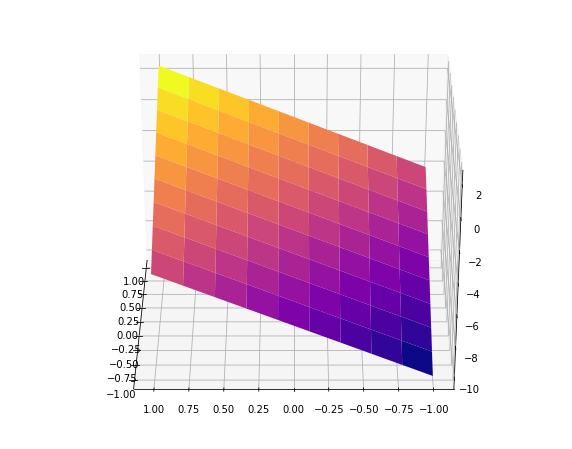

In [9]:
plot3d(perceptron)

## Forward

#### O fluxo de informação de entrada através da rede recebe o nome de *forward*, já que a informação é passada *para a frente*. Vamos realizar o forward da nossa rede de um perceptron só. Para isso, usaremos uma chamada de função com a variável onde instaciamos a camada *Linear*.

tensor([0.7391], grad_fn=<AddBackward0>)


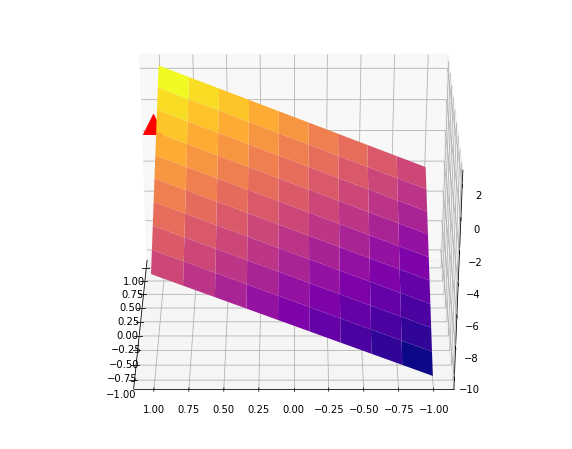

In [16]:
X = torch.Tensor([0, 1, 2])
Y = perceptron(X)

print(Y)

plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], color='r', marker='^', markersize=20)